# Frank Scarpa Notebook - EDA Project

- Author: [Frank Scarpa](https://github.com/bankoscarpa)
- Repository: [datafun-06-eda](https://github.com/bankoscarpa/datafun-06-eda)
- Purpose: This notebook explores the Diamonds dataset using **Exploratory Data Analysis (EDA)**. The goal is to uncover insights into how diamond characteristics (carat, cut, color, clarity, etc.) affect pricing.


**Import Dependencies & Data**

We’ll use **pandas** for data handling, **seaborn/matplotlib** for visualization.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Quick look at the data
diamonds.head()

## Initial Data Inspection
Before diving into analysis, let’s inspect the dataset structure:
- Preview the first 10 rows
- Check the shape (rows × columns)
- Review column data types
- Verify if there are missing values

**Summary of the summary stats**



In [17]:
print(diamonds.head(10))
print("\nShape:", diamonds.shape)  
print("\nData types:\n", diamonds.dtypes)
print("\nSummary statistics:\n", diamonds.describe())


   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39

Shape: (53940, 10)

Data types:
 carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y  

### Observations
- The dataset has **53,940 rows and 10 columns**.
- Numeric features include carat, depth, table, price, x, y, z.
- Categorical features include cut, color, and clarity.
- Price ranges from **$326 to $18,823**, showing a very wide spread.
- Carat ranges from **0.2 to 5.01**, with most diamonds being on the smaller side.


## Univariate Analysis

We’ll start by examining individual variables:

- **Numeric features** (e.g., price, carat) using histograms.
- **Categorical features** (e.g., cut, color, clarity) using bar plots.

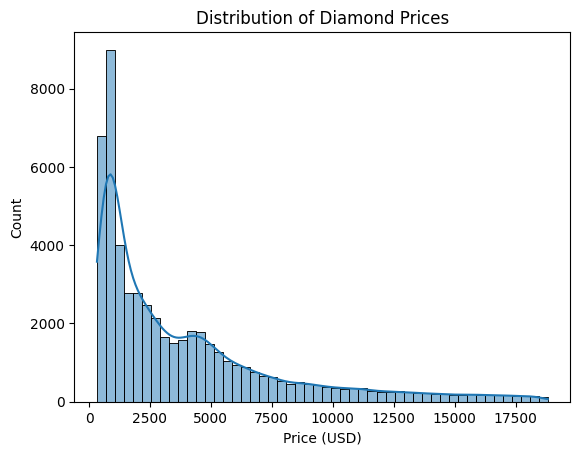

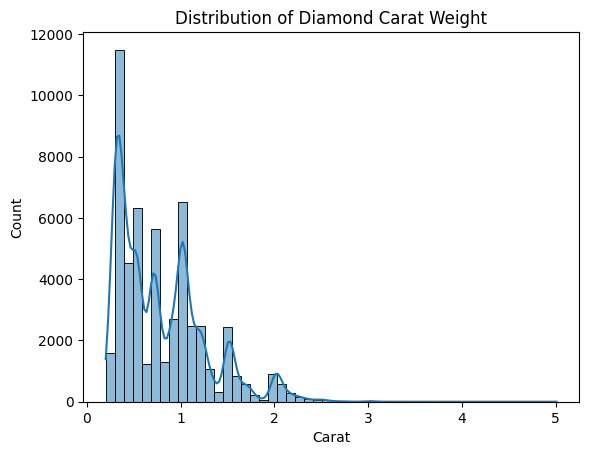

In [25]:
# Distribution of diamond prices
sns.histplot(diamonds['price'], bins=50, kde=True)
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()

# Distribution of carat weights
sns.histplot(diamonds['carat'], bins=50, kde=True)
plt.title("Distribution of Diamond Carat Weight")
plt.xlabel("Carat")
plt.ylabel("Count")
plt.show()


### Observations
- **Price**: The distribution is right-skewed, meaning most diamonds are relatively inexpensive, but a few are extremely costly.
- **Carat**: Similarly, most diamonds are small in size, with very few large ones.


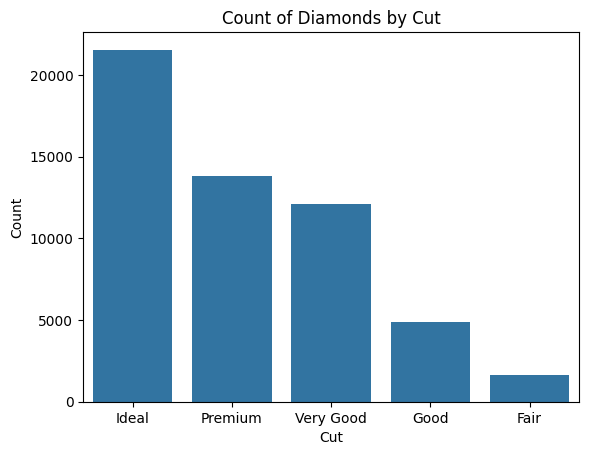

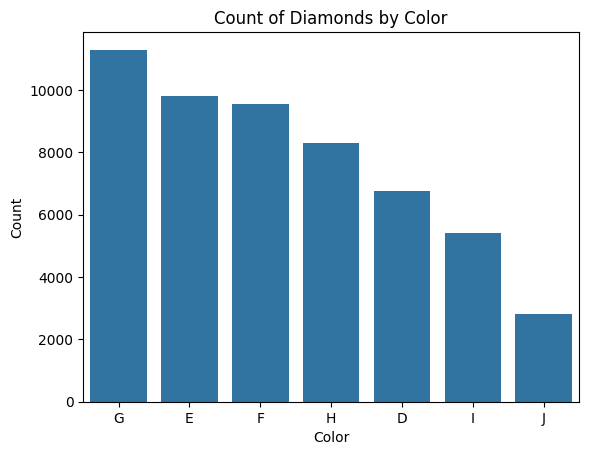

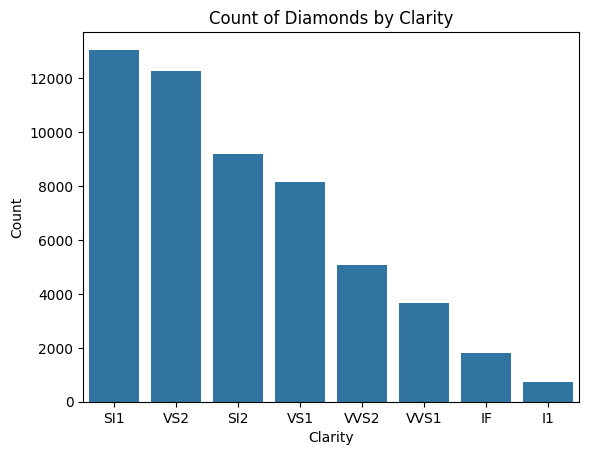

In [24]:
# Count of diamond cuts
sns.countplot(x='cut', data=diamonds, order=diamonds['cut'].value_counts().index)
plt.title("Count of Diamonds by Cut")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()

# Count of diamond colors
sns.countplot(x='color', data=diamonds, order=diamonds['color'].value_counts().index)
plt.title("Count of Diamonds by Color")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

# Count of diamond clarity
sns.countplot(x='clarity', data=diamonds, order=diamonds['clarity'].value_counts().index)
plt.title("Count of Diamonds by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.show()

### Observations
- **Cut**: Most diamonds are graded as *Ideal* or *Premium*, while *Fair* is least common.
- **Color**: The dataset includes more diamonds with mid-range colors (G, E, F) than extreme ones (D or J).
- **Clarity**: The most frequent grades are SI1 and VS2, while the rarest are I1 and IF.

## Bivariate Analysis

Now, we’ll explore how two variables relate to each other.  
Key questions:  
- How strongly does diamond size (carat) drive price?  
- How do categorical features (cut, color, clarity) influence pricing?  

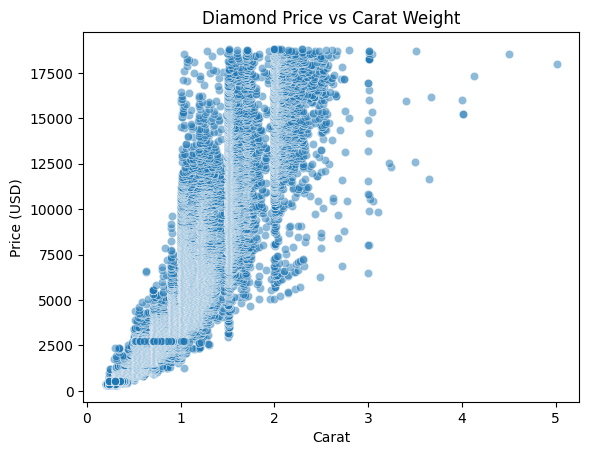

In [26]:
# Scatterplot of Carat vs Price
sns.scatterplot(x='carat', y='price', data=diamonds, alpha=0.5)
plt.title("Diamond Price vs Carat Weight")
plt.xlabel("Carat")
plt.ylabel("Price (USD)")
plt.show()



### Observations
- Price increases as carat increases, showing a strong positive relationship.  
- The relationship is **non-linear** — prices rise faster for larger diamonds.  
- There are more data points clustered at lower carats and prices, with fewer very large diamonds.  


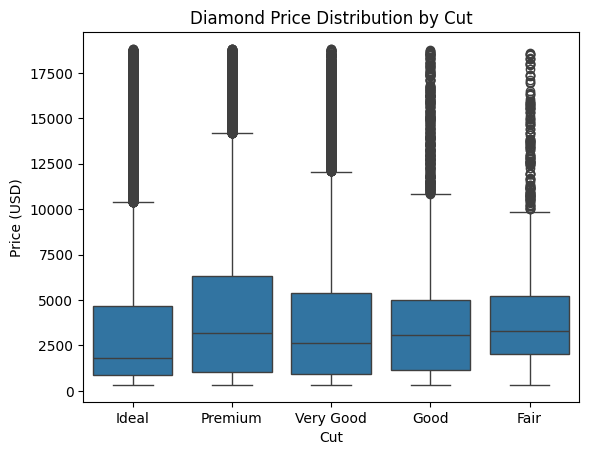

In [27]:
# Boxplot of Price by Cut
sns.boxplot(x='cut', y='price', data=diamonds, order=diamonds['cut'].value_counts().index)
plt.title("Diamond Price Distribution by Cut")
plt.xlabel("Cut")
plt.ylabel("Price (USD)")
plt.show()


### Observations
- Higher-quality cuts (*Ideal*, *Premium*) tend to have higher median prices.  
- However, there is significant overlap — meaning cut alone does not fully determine price.  
- The spread (range) of prices increases dramatically for better cuts. 

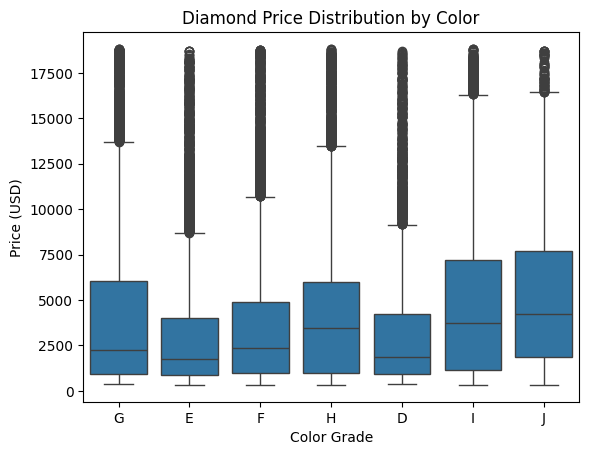

In [28]:
# Boxplot of Price by Color
sns.boxplot(x='color', y='price', data=diamonds, order=diamonds['color'].value_counts().index)
plt.title("Diamond Price Distribution by Color")
plt.xlabel("Color Grade")
plt.ylabel("Price (USD)")
plt.show()

### Observations
- Surprisingly, some lower color grades (like J) show higher prices, likely because they are associated with larger carat sizes.  
- Color has a weaker effect on price compared to carat or cut.  

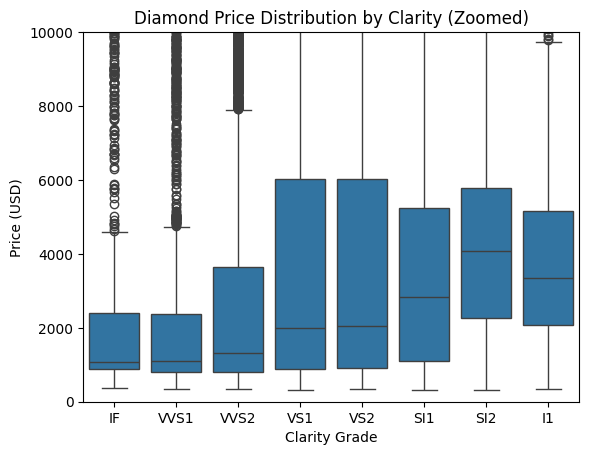

In [ ]:
# Boxplot of Price by Clarity
sns.boxplot(x='clarity', y='price', data=diamonds, order=diamonds['clarity'].value_counts().index)
plt.title("Diamond Price Distribution by Clarity")
plt.xlabel("Clarity Grade")
plt.ylabel("Price (USD)")
plt.show()

### Observations
- Higher clarity grades (*IF, VVS1, VVS2*) generally correspond to higher prices.  
- However, the overlap across clarity categories suggests that clarity alone doesn’t guarantee a higher price.  
- Again, carat seems to be a stronger price driver than clarity.  


**Correlation Analysis**

How numeric variables relate to each other

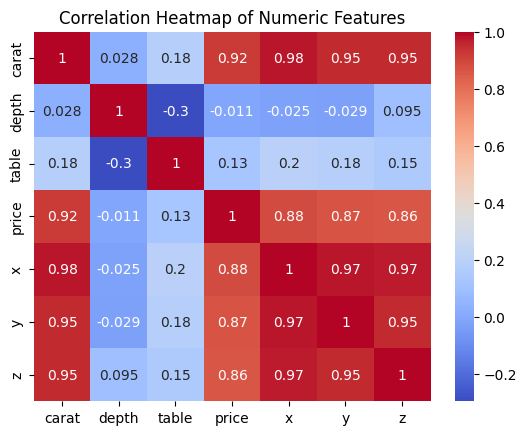

In [20]:
corr = diamonds.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


**Multivariate Analysis**

This plot examines how both cut and color together affect diamond pricing.

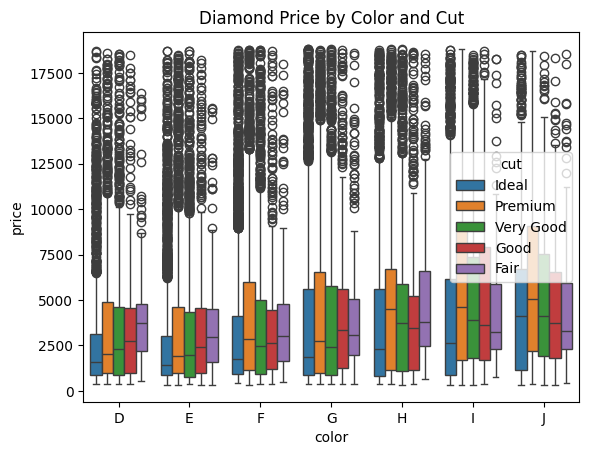

In [21]:
sns.boxplot(x='color', y='price', hue='cut', data=diamonds)
plt.title("Diamond Price by Color and Cut")
plt.show()

##  Conclusion
- **Carat** is the strongest driver of price.  
- **Cut, color, and clarity** influence price, but less than carat.  
- Price distributions are right-skewed (few very expensive diamonds).  
- Feature engineering (price per carat) highlights differences in value. 